### **HIV/AIDS Diagnoses by Neighborhood, Sex, andRace/Ethnicity in NYC**
#### Katerine Perdomo Moreno - kpm8481

#### **Data Sources**
Dataset 1: <a href=https://data.cityofnewyork.us/Health/hiv-testing/2jy6-53q8/data>NYCOpenData HIV Testing</a> <br>
Dataset 2: <a href=https://data.world/city-of-ny/fju2-rdad>DOHMH HIV/AIDS Annual Report</a>

#### **Data Wrangling**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('HIVNY.csv')

In [2]:
data.head(10)

,YEAR,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,Willowbrook,Male,Unknown,0,0,0,0,0,0
5,2013,East Flatbush - Flatbush,Male,Black,54,56.5,8,14.8,33,34.5
6,2013,East Flatbush - Flatbush,Female,Native American,0,0,0,0,0,0
7,2013,Southwest Queens,Female,Unknown,0,0,0,0,0,0
8,2012,Fordham - Bronx Park,Male,Unknown,0,0,0,0,0,0
9,2010,Flushing - Clearview,All,All,14,5.4,5,35.7,12,4.6


In [3]:
#Data Exploration
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   YEAR                                                                 2928 non-null   int64 
 1   Neighborhood (U.H.F)                                                 2928 non-null   object
 2   SEX                                                                  2928 non-null   object
 3   RACE/ETHNICITY                                                       2928 non-null   object
 4   TOTAL NUMBER OF HIV DIAGNOSES                                        2928 non-null   object
 5   HIV DIAGNOSES PER 100,000 POPULATION                                 2860 non-null   object
 6   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        2928 non-null   object
 7   PROPORTION OF C

In [44]:
data['Neighborhood (U.H.F)'].value_counts()

Pelham - Throgs Neck                    68
High Bridge - Morrisania                68
Bayside - Little Neck                   68
Greenwich Village - SoHo                68
East New York                           68
Hunts Point - Mott Haven                68
Canarsie - Flatlands                    68
Kingsbridge - Riverdale                 68
Bedford Stuyvesant - Crown Heights      68
Southeast Queens                        68
Northeast Bronx                         68
East Flatbush - Flatbush                68
Borough Park                            68
Bensonhurst - Bay Ridge                 68
Willowbrook                             68
Coney Island - Sheepshead Bay           68
Long Island City - Astoria              68
Rockaway                                68
Central Harlem - Morningside Heights    68
Williamsburg - Bushwick                 68
Lower Manhattan                         68
Unknown                                 68
Sunset Park                             68
Downtown - 

In [45]:
data['Neighborhood (U.H.F)'] = data['Neighborhood (U.H.F)'].str.replace('All','No defined')
data['Neighborhood (U.H.F)'] = data['Neighborhood (U.H.F)'].str.replace('Unknown','No defined')
data['Neighborhood (U.H.F)'].value_counts()

No defined                              72
Pelham - Throgs Neck                    68
Sunset Park                             68
Greenwich Village - SoHo                68
East New York                           68
Hunts Point - Mott Haven                68
Canarsie - Flatlands                    68
Kingsbridge - Riverdale                 68
Bedford Stuyvesant - Crown Heights      68
Southeast Queens                        68
Northeast Bronx                         68
East Flatbush - Flatbush                68
Borough Park                            68
Bensonhurst - Bay Ridge                 68
Willowbrook                             68
Coney Island - Sheepshead Bay           68
Long Island City - Astoria              68
Rockaway                                68
Central Harlem - Morningside Heights    68
Williamsburg - Bushwick                 68
Lower Manhattan                         68
Bayside - Little Neck                   68
Union Square - Lower Eastside           68
High Bridge

In [46]:
data.isnull().sum()

YEAR                                                                    0
Neighborhood (U.H.F)                                                    0
SEX                                                                     0
RACE/ETHNICITY                                                          0
TOTAL NUMBER OF HIV DIAGNOSES                                           0
HIV DIAGNOSES PER 100,000 POPULATION                                   68
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    68
TOTAL NUMBER OF AIDS DIAGNOSES                                          0
AIDS DIAGNOSES PER 100,000 POPULATION                                  68
dtype: int64

In [47]:
data.isna().sum()

YEAR                                                                    0
Neighborhood (U.H.F)                                                    0
SEX                                                                     0
RACE/ETHNICITY                                                          0
TOTAL NUMBER OF HIV DIAGNOSES                                           0
HIV DIAGNOSES PER 100,000 POPULATION                                   68
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    68
TOTAL NUMBER OF AIDS DIAGNOSES                                          0
AIDS DIAGNOSES PER 100,000 POPULATION                                  68
dtype: int64

In [6]:
## Dataset two 
data2 = pd.read_csv('DOHMH_HIV_AIDS_Annual_Report.csv')

In [7]:
data2.head(10)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379,48.3,640,66,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595,79.1,480,66,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733,21.1,153,66,622,17.6,0.6,68,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51,99999.0,7,63,32,99999.0,99999.0,55,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64,22,6.4,0.1,57,1,1.4,1.4,0.0
5,2011,All,All,Female,20 - 29,All,178,24.7,20,67,96,13.3,0.3,48,19,7.2,3.2,4.0
6,2011,All,All,Female,30 - 39,All,176,26.9,31,66,133,20.3,0.6,61,53,9.4,5.7,3.7
7,2011,All,All,Female,40 - 49,All,195,33.0,50,62,210,35.5,1.4,66,184,15.9,7.8,8.1
8,2011,All,All,Female,50 - 59,All,130,23.5,32,72,133,24.0,1.3,73,231,24.1,11.5,12.6
9,2011,All,All,Female,60+,All,57,6.7,23,68,60,7.1,0.3,81,129,33.5,10.6,22.9


In [8]:
data2.isnull().sum()

Year                                0
Borough                             0
UHF                                 0
Gender                              0
Age                                 0
Race                                0
HIV diagnoses                       0
HIV diagnosis rate                  0
Concurrent diagnoses                0
% linked to care within 3 months    0
AIDS diagnoses                      0
AIDS diagnosis rate                 0
PLWDHI prevalence                   0
% viral suppression                 0
Deaths                              0
Death rate                          0
HIV-related death rate              0
Non-HIV-related death rate          0
dtype: int64

In [9]:
data2.isna().sum()

Year                                0
Borough                             0
UHF                                 0
Gender                              0
Age                                 0
Race                                0
HIV diagnoses                       0
HIV diagnosis rate                  0
Concurrent diagnoses                0
% linked to care within 3 months    0
AIDS diagnoses                      0
AIDS diagnosis rate                 0
PLWDHI prevalence                   0
% viral suppression                 0
Deaths                              0
Death rate                          0
HIV-related death rate              0
Non-HIV-related death rate          0
dtype: int64

In [73]:
#Replace value the column Age
data2['Age'] = data2['Age'].str.replace('All','No defined')
data2.head(10)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,No defined,All,3379,48.3,640,66,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1,2011,All,All,Male,No defined,All,2595,79.1,480,66,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,2011,All,All,Female,No defined,All,733,21.1,153,66,622,17.6,0.6,68,605,14.0,6.0,8.0
3,2011,All,All,Transgender,No defined,All,51,99999.0,7,63,32,99999.0,99999.0,55,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64,22,6.4,0.1,57,1,1.4,1.4,0.0
5,2011,All,All,Female,20 - 29,All,178,24.7,20,67,96,13.3,0.3,48,19,7.2,3.2,4.0
6,2011,All,All,Female,30 - 39,All,176,26.9,31,66,133,20.3,0.6,61,53,9.4,5.7,3.7
7,2011,All,All,Female,40 - 49,All,195,33.0,50,62,210,35.5,1.4,66,184,15.9,7.8,8.1
8,2011,All,All,Female,50 - 59,All,130,23.5,32,72,133,24.0,1.3,73,231,24.1,11.5,12.6
9,2011,All,All,Female,60+,All,57,6.7,23,68,60,7.1,0.3,81,129,33.5,10.6,22.9


In [74]:
data2['Age'].value_counts()

No defined    3125
30 - 39        480
13 - 19        480
40 - 49        480
60+            480
50 - 59        480
20 - 29        480
Name: Age, dtype: int64

In [75]:
dist_test = data2.groupby(['Age'])['HIV diagnoses'].sum()

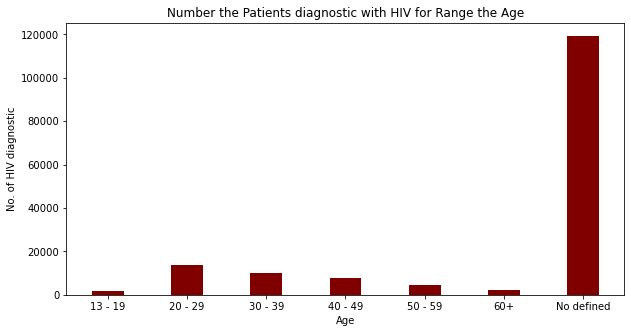

In [76]:
Age = list(dist_test.keys())
values = []
for i in range(len(dist_test)):
    values.append(dist_test[i])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Age, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Age")
plt.ylabel("No. of HIV diagnostic")
plt.title("Number the Patients diagnostic with HIV for Range the Age")
plt.show()

In [77]:
dist_gender = data2.groupby(['Gender'])['HIV diagnoses'].sum()
dist_gender

Gender
All            39775
Female         25844
Male           93251
Transgender      230
Name: HIV diagnoses, dtype: int64

#### **Porcentage Patients Diagnotic with HIV**

In [79]:
total_diagnostic_HIV = sum(data2['HIV diagnoses'])
#Porcentage Gender 
porc_female = (dist_gender['Female']*100)/total_diagnostic_HIV
porc_male = (dist_gender['Male']*100)/total_diagnostic_HIV
porc_trans = (dist_gender['Transgender']*100)/total_diagnostic_HIV
porc_all = (dist_gender['All']*100)/total_diagnostic_HIV
print("Porcentage Gender Female Diagnostic with HIV: ", round(porc_female,2))
print("Porcentage Gender Male Diagnostic with HIV: ", round(porc_male,2))
print("Porcentage Gender Transgender Diagnostic with HIV: ", round(porc_trans,2))
print("Porcentage Gender All Diagnostic with HIV: ", round(porc_all,2))

Porcentage Gender Female Diagnostic with HIV:  16.24
Porcentage Gender Male Diagnostic with HIV:  58.61
Porcentage Gender Transgender Diagnostic with HIV:  0.14
Porcentage Gender All Diagnostic with HIV:  25.0
